In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams["ps.useafm"] = True
import random
random.seed(21)
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/CSE 4-2/CSE-442/Project Materials/mitbih_train.csv',header=None) # give your own drive location
test_df=pd.read_csv('/content/drive/MyDrive/CSE 4-2/CSE-442/Project Materials/mitbih_test.csv',header=None) # give your own drive location

In [ ]:
df=train_df

In [ ]:
df.shape

(87554, 188)

In [ ]:
df_test=test_df
df_test.shape

(21892, 188)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
df[187] = df[187].astype('int64')
target_col = df[187]
df_test[187] = df_test[187].astype('int64')
test_target_col = df_test[187]
labels = ['Normal beat','Supraventricular premature beat','Premature ventricular contraction','Fusion of ventricular and normal beat','Unclassifiable beat']

In [ ]:
pd.Series(np.bincount(target_col),index=labels)

Normal beat                              72471
Supraventricular premature beat           2223
Premature ventricular contraction         5788
Fusion of ventricular and normal beat      641
Unclassifiable beat                       6431
dtype: int64

Text(0.5, 1.0, 'Training dataset distribution among 5 classes')

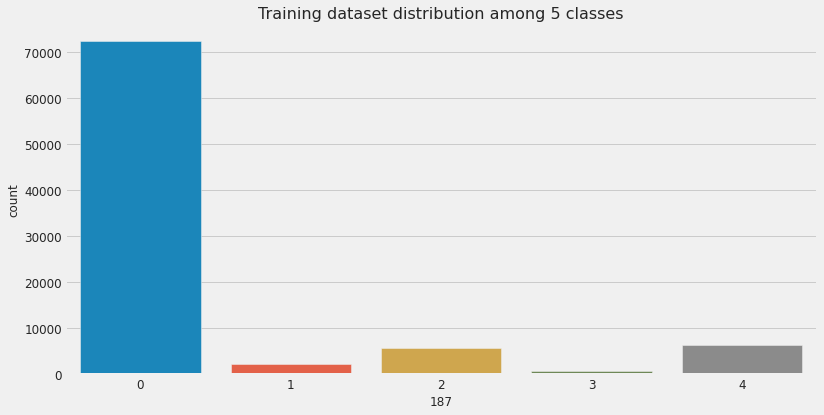

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(target_col)
plt.title("Training dataset distribution among 5 classes",fontsize=16)

Text(0.5, 1.0, 'Testing dataset distribution among 5 classes')

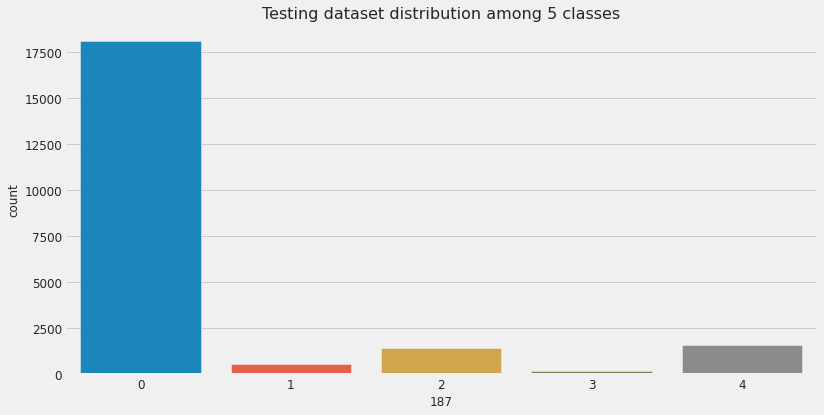

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(test_target_col)
plt.title("Testing dataset distribution among 5 classes",fontsize=16)

In [ ]:
pd.Series(np.bincount(test_target_col),index=labels)

Normal beat                              18118
Supraventricular premature beat            556
Premature ventricular contraction         1448
Fusion of ventricular and normal beat      162
Unclassifiable beat                       1608
dtype: int64

In [ ]:
X = df.drop(187,axis=1)
y = target_col
print(X.shape)
print(y.shape)

x_test = df_test.drop(187,axis=1)
y_test = df_test[187].astype('int64')
print(x_test.shape)
print(y_test.shape)

(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [ ]:
C0 = (target_col == 0)
C1 = (target_col == 1)
C2 = (target_col == 2)
C3 = (target_col == 3)
C4 = (target_col == 4)

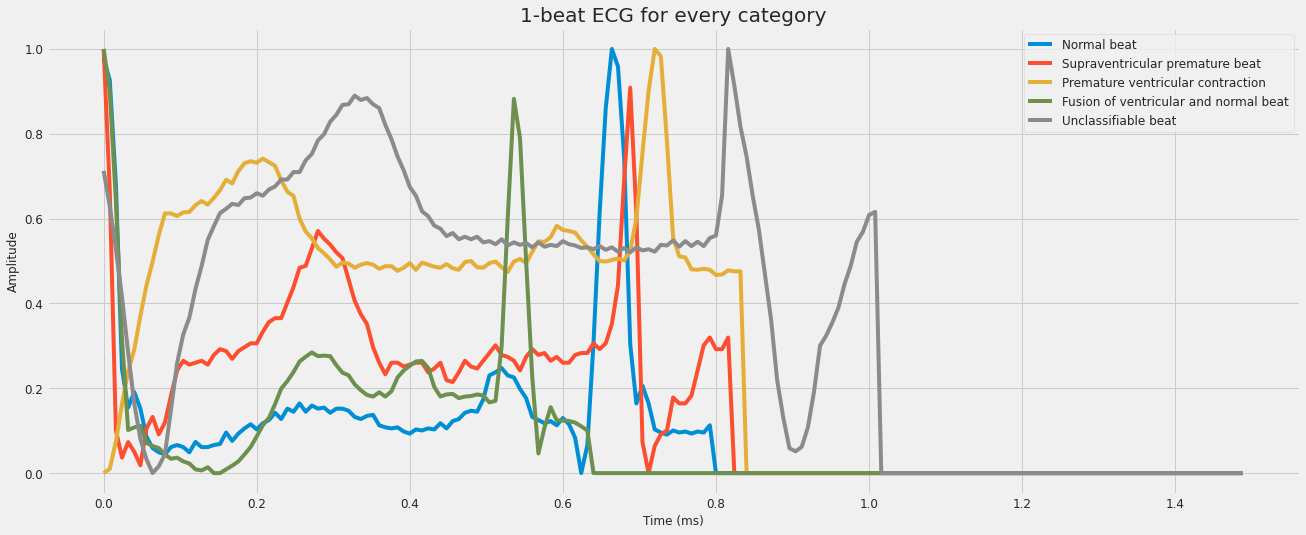

In [ ]:
# df[C0].iloc[0]
x = np.arange(0, 187)*8/1000
plt.figure()
plt.plot(x, X[C0].iloc[0], label=labels[0])
plt.plot(x, X[C1].iloc[0], label=labels[1])
plt.plot(x, X[C2].iloc[0], label=labels[2])
plt.plot(x, X[C3].iloc[0], label=labels[3])
plt.plot(x, X[C4].iloc[0], label=labels[4])
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude")
plt.xlabel("Time (ms)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y.values,random_state=42,stratify=y.values,shuffle=True,train_size=0.75)
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)

The shape of training data :  (65665, 187) (65665,)
The shape of validation data :  (21889, 187) (21889,)


In [ ]:
pd.Series(np.bincount(y_train),index=labels)

Normal beat                              54353
Supraventricular premature beat           1667
Premature ventricular contraction         4341
Fusion of ventricular and normal beat      481
Unclassifiable beat                       4823
dtype: int64

In [ ]:
pd.Series(np.bincount(y_val),index=labels)

Normal beat                              18118
Supraventricular premature beat            556
Premature ventricular contraction         1447
Fusion of ventricular and normal beat      160
Unclassifiable beat                       1608
dtype: int64

In [ ]:
pd.Series(np.bincount(y_test),index=labels)

Normal beat                              18118
Supraventricular premature beat            556
Premature ventricular contraction         1448
Fusion of ventricular and normal beat      162
Unclassifiable beat                       1608
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = np.expand_dims(x_train, 2)
x_val = np.expand_dims(x_val, 2)
x_test = np.expand_dims(x_test, 2)
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)
print("The shape of testing data : ",x_test.shape,y_test.shape)

The shape of training data :  (65665, 187, 1) (65665, 5)
The shape of validation data :  (21889, 187, 1) (21889, 5)
The shape of testing data :  (21892, 187, 1) (21892, 5)


In [ ]:
y_test[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation , Dropout, BatchNormalization, AveragePooling1D, ZeroPadding1D
from keras import backend as K
from keras import Sequential
from keras.initializers import glorot_uniform

In [ ]:
n_obs, feature, depth = x_train.shape
batch_size = 512

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name=bn_name_base + '2c')(X)

    X_shortcut = Conv1D(filters=F3, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=2, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet(input_shape=(feature,depth)):

    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)

    X = Conv1D(64, 7, strides=2, name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3, strides= 2)(X)

    X = convolutional_block(X, f=3, filters=[128, 128, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [128, 128, 256], stage=2, block='b')
    X = identity_block(X, 3, [128, 128, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling1D(pool_size= 2, padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet')

    return model

In [ ]:
base_model = ResNet(input_shape=(feature,depth))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(5,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 193, 1)      0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv1D)                 (None, 94, 64)       512         ['zero_padding1d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 94, 64)       256         ['conv1[0][0]']                  
                                                                                              

In [ ]:
model.compile(
          loss = 'categorical_crossentropy',
          optimizer = 'Adam',metrics = ['AUC','Accuracy','Precision','Recall']
                )

In [ ]:
import keras
h = model.fit(
      x_train,y_train,validation_data=(x_val,y_val),
                              epochs=10,batch_size=batch_size,
                        callbacks = [
                              keras.callbacks.EarlyStopping(monitor='val_auc',patience=5,mode='auto'),
                              keras.callbacks.ModelCheckpoint('./model_{val_auc:.3f}.h5',
                              save_best_only = True,save_weights_only=False,
                              monitor='val_auc')
                          ])

Epoch 1/10
129/129 [==============================] - 54s 417ms/step - loss: 0.0495 - auc: 0.9990 - Accuracy: 0.9848 - precision: 0.9856 - recall: 0.9842 - val_loss: 0.0568 - val_auc: 0.9984 - val_Accuracy: 0.9842 - val_precision: 0.9848 - val_recall: 0.9836
Epoch 2/10
129/129 [==============================] - 53s 412ms/step - loss: 0.0415 - auc: 0.9992 - Accuracy: 0.9873 - precision: 0.9878 - recall: 0.9867 - val_loss: 0.0590 - val_auc: 0.9979 - val_Accuracy: 0.9835 - val_precision: 0.9843 - val_recall: 0.9831
Epoch 3/10
129/129 [==============================] - 53s 408ms/step - loss: 0.0372 - auc: 0.9994 - Accuracy: 0.9883 - precision: 0.9888 - recall: 0.9878 - val_loss: 0.0655 - val_auc: 0.9982 - val_Accuracy: 0.9813 - val_precision: 0.9820 - val_recall: 0.9808
Epoch 4/10
129/129 [==============================] - 53s 414ms/step - loss: 0.0340 - auc: 0.9995 - Accuracy: 0.9890 - precision: 0.9895 - recall: 0.9885 - val_loss: 0.0563 - val_auc: 0.9978 - val_Accuracy: 0.9853 - val_pre

In [ ]:
model.save("/content/drive/MyDrive/CSE 4-2/CSE-442/Project Materials/resnet18_model.h5") # give your own drive location

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = keras.models.load_model('/content/drive/MyDrive/CSE 4-2/CSE-442/Project Materials/resnet18_model.h5') # give your own drive location

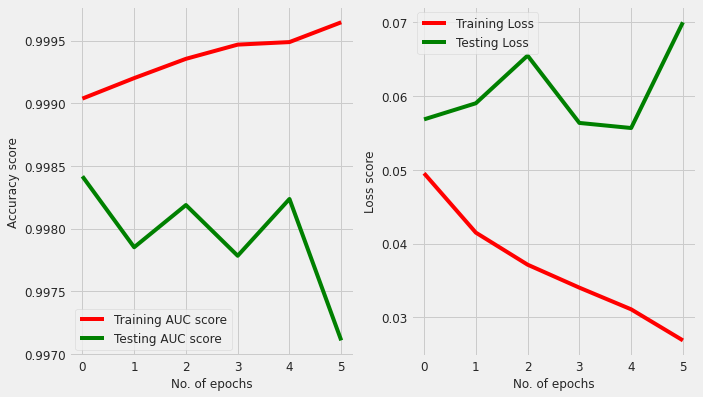

In [ ]:
## Model auc score and loss visualization
auc = h.history['auc']
val_auc=h.history['val_auc']
loss=h.history['loss']
val_loss=h.history['val_loss']

epochs=range(len(auc)) #No. of epochs

plt.figure(figsize=(10,6))
ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)
ax0.plot(epochs,auc,'r',label='Training AUC score')
ax0.plot(epochs,val_auc,'g',label='Testing AUC score')
ax0.legend()
ax0.set_xlabel('No. of epochs')
ax0.set_ylabel('Accuracy score')


ax1.plot(epochs,loss,'r',label='Training Loss')
ax1.plot(epochs,val_loss,'g',label='Testing Loss')
ax1.set_xlabel('No. of epochs')
ax1.set_ylabel('Loss score')
ax1.legend()
plt.show()

In [ ]:
model.evaluate(x_val,y_val)

685/685 [==============================] - 12s 17ms/step - loss: 0.0700 - auc: 0.9971 - Accuracy: 0.9843 - precision: 0.9845 - recall: 0.9842


[0.06997654587030411,
 0.9971081018447876,
 0.9842843413352966,
 0.9845077991485596,
 0.984192967414856]

In [ ]:
model.evaluate(x_test,y_test)

685/685 [==============================] - 12s 17ms/step - loss: 0.0770 - auc: 0.9965 - Accuracy: 0.9834 - precision: 0.9837 - recall: 0.9832


[0.07700303941965103,
 0.9964926838874817,
 0.9834185838699341,
 0.9837294220924377,
 0.9831901788711548]

In [ ]:
y_pre_val = model.predict(x_val)
y_pred_val = np.zeros(y_pre_val.shape[0])
for i in range(y_pred_val.shape[0]):
    y_pred_val[i] = np.argmax(y_pre_val[i])
y_pred_val = tf.keras.utils.to_categorical(y_pred_val)

685/685 [==============================] - 12s 13ms/step


In [ ]:
y_pre = model.predict(x_test)
y_pred = np.zeros(y_pre.shape[0])
for i in range(y_pred.shape[0]):
    y_pred[i] = np.argmax(y_pre[i])
y_pred = tf.keras.utils.to_categorical(y_pred)

685/685 [==============================] - 9s 13ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(y_true=y_val,y_pred=y_pred_val))
f1_score_per_class_validation = f1_score(y_true=y_val,y_pred=y_pred_val,average=None) 
print("The f1-score per class: ",f1_score_per_class_validation)
print("The f1-score : ",f1_score(y_true=y_val,y_pred=y_pred_val,average='weighted'))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.96      0.76      0.85       556
           2       0.94      0.97      0.96      1447
           3       0.94      0.54      0.69       160
           4       0.99      0.99      0.99      1608

   micro avg       0.98      0.98      0.98     21889
   macro avg       0.96      0.85      0.90     21889
weighted avg       0.98      0.98      0.98     21889
 samples avg       0.98      0.98      0.98     21889

The f1-score per class:  [0.991726   0.84884885 0.95714286 0.68774704 0.99033365]
The f1-score :  0.9834863763828054


In [ ]:
print(classification_report(y_true=y_test,y_pred=y_pred))
f1_score_per_class_test = f1_score(y_true=y_test,y_pred=y_pred,average=None) 
print("The f1-score per class: ",f1_score_per_class_test)
print("The f1-score : ",f1_score(y_true=y_test,y_pred=y_pred,average='weighted'))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.95      0.74      0.83       556
           2       0.95      0.96      0.96      1448
           3       0.90      0.57      0.70       162
           4       1.00      0.98      0.99      1608

   micro avg       0.98      0.98      0.98     21892
   macro avg       0.96      0.85      0.89     21892
weighted avg       0.98      0.98      0.98     21892
 samples avg       0.98      0.98      0.98     21892

The f1-score per class:  [0.99149053 0.82912032 0.95571576 0.70188679 0.98776279]
The f1-score :  0.982583635819241


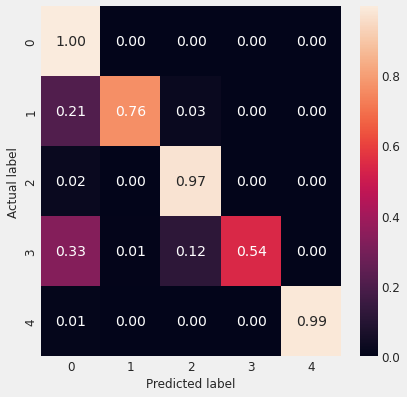

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=np.argmax(y_val,axis=1),y_pred=np.argmax(y_pred_val,axis=1),normalize="true")
sns.heatmap(cm, annot=True, ax = ax, fmt = '.2f',)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

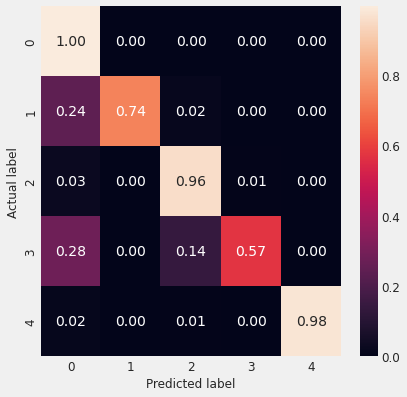

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=np.argmax(y_test,axis=1),y_pred=np.argmax(y_pred,axis=1),normalize="true")
sns.heatmap(cm, annot=True, ax = ax, fmt = '.2f')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [ ]:
from sklearn.metrics import precision_score
print("The precision score : ",precision_score(y_true=y_val,y_pred=y_pred_val,average='weighted'))

The precision score :  0.9840630984574238


In [ ]:
print("The precision score : ",precision_score(y_true=y_test,y_pred=y_pred,average='weighted'))

The precision score :  0.9830149529890689


In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy score : ",accuracy_score(y_true=y_val,y_pred=y_pred_val))

The accuracy score :  0.9842843437342957


In [ ]:
print("The accuracy score : ",accuracy_score(y_true=y_test,y_pred=y_pred))

The accuracy score :  0.9834186004019734


In [ ]:
num_models = 10
accuracy_scores = []
for num in range(num_models):
    print("Training model : ",num+1)
    h = model.fit(
          x_train,y_train,validation_data=(x_val,y_val),
                                  epochs=40,batch_size=batch_size,
                            callbacks = [
                                  keras.callbacks.EarlyStopping(monitor='val_auc',patience=5,mode='auto'),
                                  keras.callbacks.ModelCheckpoint('./model_{val_auc:.3f}.h5',
                                  save_best_only = True,save_weights_only=False,
                                  monitor='val_auc')
                              ])
    y_pre = model.predict(x_test)
    y_pred = np.zeros(y_pre.shape[0])
    for i in range(y_pred.shape[0]):
        y_pred[i] = np.argmax(y_pre[i])
    y_pred = tf.keras.utils.to_categorical(y_pred)
    b = accuracy_score(y_true=y_test,y_pred=y_pred)
    print("The accuracy score of model "+str(num+1)+" : "+str(b))
    accuracy_scores.append(b)
print(accuracy_scores)
print("The average accuracy : ",np.mean(accuracy_scores))

In [ ]:
for i in range(len(labels)):
    print("The f1-score for class "+str(i)+" ("+str(labels[i])+") : ",f1_score_per_class_validation[i])

In [ ]:
for i in range(len(labels)):
    print("The f1-score for class "+str(i)+" ("+str(labels[i])+") : ",f1_score_per_class_test[i])